In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [4]:
#load data
df = pd.read_csv('sustainable_energy_preprocessed.csv')

In [5]:
df

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),...,Density_89,Density_9,Density_93,Density_94,Density_95,Density_96,Density_99,Value_co2_emissions_kt_by_country,Renewable energy share in the total final energy consumption (%),Electricity from renewables (TWh)
0,-1.658303,-2.557738,-1.496598,-0.493223,-0.483384,-0.202319,-0.187525,0.854719,-0.731738,-1.069235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,760.000000,44.99,0.31
1,-1.493106,-2.476329,-1.470367,-0.494932,-0.482819,-0.202521,-0.187525,1.405501,-0.733627,-1.040080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730.000000,45.60,0.50
2,-1.327910,-2.299862,-1.444137,-0.496783,-0.463218,-0.202406,-0.187525,1.300367,-0.734376,-1.139208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1029.999971,37.83,0.56
3,-1.162713,-2.123568,-1.410037,-0.498586,-0.350228,-0.201887,-0.187525,0.885906,-0.733826,-1.139208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1220.000029,36.66,0.63
4,-0.997517,-1.947369,-1.373314,-0.500200,0.000000,-0.201829,-0.187525,0.765716,-0.734567,-1.197520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1029.999971,44.24,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,0.984841,-1.203180,-0.877554,-0.238537,-0.483332,-0.192694,-0.187525,0.348239,-0.647607,1.368170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11020.000460,81.90,3.32
3645,1.150037,-1.149693,-0.877554,-0.241147,-0.454905,-0.193991,-0.187525,0.636203,-0.652200,1.225308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10340.000150,82.46,4.30
3646,1.315234,-1.103579,-0.874931,-0.145272,-0.483435,-0.192031,-0.187525,0.662851,-0.641443,1.318606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12380.000110,80.23,5.46
3647,1.480430,-1.063591,-0.869685,-0.150636,-0.482203,-0.192233,-0.187525,0.550577,-0.654051,1.505201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11760.000230,81.50,4.58


In [6]:
num_features=df.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove('Electricity from renewables (TWh)')
num_features.remove('Value_co2_emissions_kt_by_country')
num_features.remove('Renewable energy share in the total final energy consumption (%)')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Columns: 319 entries, Year to Electricity from renewables (TWh)
dtypes: float64(319)
memory usage: 8.9 MB


In [8]:
df

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),...,Density_89,Density_9,Density_93,Density_94,Density_95,Density_96,Density_99,Value_co2_emissions_kt_by_country,Renewable energy share in the total final energy consumption (%),Electricity from renewables (TWh)
0,-1.658303,-2.557738,-1.496598,-0.493223,-0.483384,-0.202319,-0.187525,0.854719,-0.731738,-1.069235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,760.000000,44.99,0.31
1,-1.493106,-2.476329,-1.470367,-0.494932,-0.482819,-0.202521,-0.187525,1.405501,-0.733627,-1.040080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730.000000,45.60,0.50
2,-1.327910,-2.299862,-1.444137,-0.496783,-0.463218,-0.202406,-0.187525,1.300367,-0.734376,-1.139208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1029.999971,37.83,0.56
3,-1.162713,-2.123568,-1.410037,-0.498586,-0.350228,-0.201887,-0.187525,0.885906,-0.733826,-1.139208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1220.000029,36.66,0.63
4,-0.997517,-1.947369,-1.373314,-0.500200,0.000000,-0.201829,-0.187525,0.765716,-0.734567,-1.197520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1029.999971,44.24,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,0.984841,-1.203180,-0.877554,-0.238537,-0.483332,-0.192694,-0.187525,0.348239,-0.647607,1.368170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11020.000460,81.90,3.32
3645,1.150037,-1.149693,-0.877554,-0.241147,-0.454905,-0.193991,-0.187525,0.636203,-0.652200,1.225308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10340.000150,82.46,4.30
3646,1.315234,-1.103579,-0.874931,-0.145272,-0.483435,-0.192031,-0.187525,0.662851,-0.641443,1.318606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12380.000110,80.23,5.46
3647,1.480430,-1.063591,-0.869685,-0.150636,-0.482203,-0.192233,-0.187525,0.550577,-0.654051,1.505201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11760.000230,81.50,4.58


In [9]:
# Apply transformations
X = df.drop([
    'Value_co2_emissions_kt_by_country',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from renewables (TWh)'
], axis=1)
y = df[['Value_co2_emissions_kt_by_country',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from renewables (TWh)']]
X_transformed_df=X[num_features].copy()
print("\nTransformed Features Head:")
X_transformed_df.head()


Transformed Features Head:


,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),...,Density_83,Density_84,Density_87,Density_89,Density_9,Density_93,Density_94,Density_95,Density_96,Density_99
0,-1.658303,-2.557738,-1.496598,-0.493223,-0.483384,-0.202319,-0.187525,0.854719,-0.731738,-1.069235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.493106,-2.476329,-1.470367,-0.494932,-0.482819,-0.202521,-0.187525,1.405501,-0.733627,-1.040080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.327910,-2.299862,-1.444137,-0.496783,-0.463218,-0.202406,-0.187525,1.300367,-0.734376,-1.139208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.162713,-2.123568,-1.410037,-0.498586,-0.350228,-0.201887,-0.187525,0.885906,-0.733826,-1.139208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.997517,-1.947369,-1.373314,-0.500200,0.000000,-0.201829,-0.187525,0.765716,-0.734567,-1.197520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_transformed_df.columns

Index(['Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       ...
       'Density_83', 'Density_84', 'Density_87', 'Density_89', 'Density_9',
       'Density_93', 'Density_94', 'Density_95', 'Density_96', 'Density_99'],
      dtype='object', length=316)

In [11]:
X_transformed_df.shape

(3649, 316)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)

In [13]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (2919, 316)
Testing set shape: (730, 316)


In [14]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

multi_rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=10, random_state=42))
multi_rf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=10,
                                                     random_state=42))

In [15]:
y_pred = multi_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

results = {
    'MSE': mse,
    'MAE': mae,
    'R2': r2
}

results

{'MSE': array([1.28522652e+09, 1.96386597e+01, 3.37440880e+01]),
 'MAE': array([6.70213123e+03, 1.98542962e+00, 1.54337397e+00]),
 'R2': array([0.99547446, 0.97678234, 0.99223922])}

In [16]:
    # create function to get results to avoid repetition
def get_results(y_test, y_pred):
     mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
     mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
     r2 = r2_score(y_test, y_pred, multioutput='raw_values')

     results = {
                'MSE': mse,
                'MAE': mae,
                'R2': r2
            }

     results= {
            'MSE': mse,
            'MAE': mae,
            'R2': r2
            }
     return results

In [17]:
get_results(y_test, y_pred)

{'MSE': array([1.28522652e+09, 1.96386597e+01, 3.37440880e+01]),
 'MAE': array([6.70213123e+03, 1.98542962e+00, 1.54337397e+00]),
 'R2': array([0.99547446, 0.97678234, 0.99223922])}

In [18]:
models = {
    'Linear Regression': MultiOutputRegressor(LinearRegression()),
    'Random Forest': MultiOutputRegressor(RandomForestRegressor(n_estimators=10, random_state=42)),
    'Decision Tree': MultiOutputRegressor(DecisionTreeRegressor(random_state=42))
}

results = {}
for name, model in tqdm(models.items(), desc="Training and Evaluating Models"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = get_results(y_test, y_pred)

results

Training and Evaluating Models: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]


{'Linear Regression': {'MSE': array([2.18490761e+09, 3.83124049e+01, 3.97786767e+02]),
  'MAE': array([2.71031227e+04, 3.56037377e+00, 7.71362340e+00]),
  'R2': array([0.99230649, 0.95470544, 0.90851333])},
 'Random Forest': {'MSE': array([1.28522652e+09, 1.96386597e+01, 3.37440880e+01]),
  'MAE': array([6.70213123e+03, 1.98542962e+00, 1.54337397e+00]),
  'R2': array([0.99547446, 0.97678234, 0.99223922])},
 'Decision Tree': {'MSE': array([3.16316504e+09, 2.54366153e+01, 3.68185012e+01]),
  'MAE': array([7.31102627e+03, 2.00113699e+00, 1.68976712e+00]),
  'R2': array([0.98886185, 0.96992775, 0.99153214])}}

In [19]:
# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
results_df


Model Performance Comparison:


,MSE,MAE,R2
Linear Regression,"[2184907609.4714293, 38.312404858087405, 397.7...","[27103.12267436266, 3.5603737747030544, 7.7136...","[0.992306494965002, 0.9547054435521403, 0.9085..."
Random Forest,"[1285226519.7340486, 19.63865967039249, 33.744...","[6702.131231584934, 1.9854296227425017, 1.5433...","[0.9954744554608059, 0.9767823402812802, 0.992..."
Decision Tree,"[3163165037.021889, 25.436615335768472, 36.818...","[7311.026274347354, 2.0011369863013706, 1.6897...","[0.988861851167819, 0.969927750204246, 0.99153..."


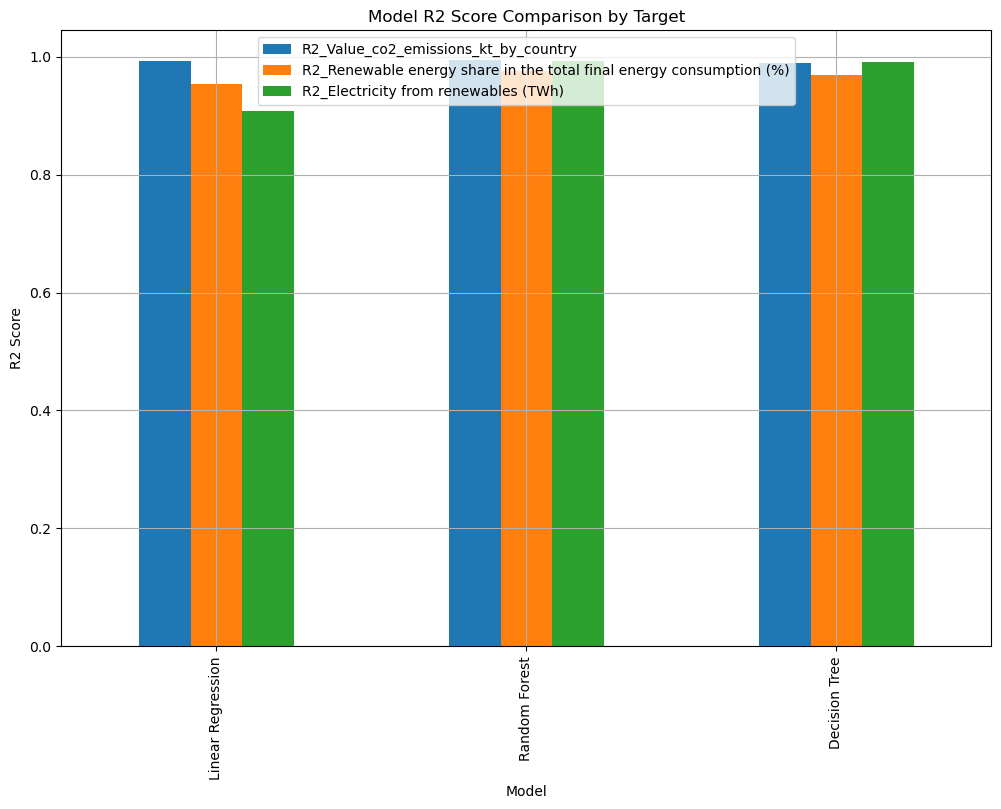

In [20]:
# Convert results_df to a DataFrame with separate columns for each target and metric
metrics = ['R2', 'MAE', 'MSE']
target_names = y_test.columns.tolist()

# Flatten results for plotting
flat_results = {}
for model in results_df.index:
    for i, target in enumerate(target_names):
        for metric in metrics:
            flat_results.setdefault(f"{metric}_{target}", {})[model] = results_df.loc[model, metric][i]

flat_results_df = pd.DataFrame(flat_results)

# Plot R2 scores for each target
flat_results_df[[f'R2_{t}' for t in target_names]].plot(kind='bar', figsize=(12, 8))
plt.title('Model R2 Score Comparison by Target')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.grid()
plt.show()

In [21]:
# Find the best model based on mean R2 score across all targets
mean_r2 = results_df['R2'].apply(np.mean)
best_model_name = mean_r2.idxmax()
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest
